<a href="https://colab.research.google.com/github/balajivijayakumar1994/mlnotebook/blob/main/Second_Iris_Data_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data  # Features: Sepal and Petal measurements
y = iris.target  # Labels: 0, 1, or 2 (Setosa, Versicolor, Virginica)

# 2. Preprocess the data
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Build a neural network
model = Sequential([
    Dense(10, input_dim=4, activation='relu'),  # Input layer + hidden layer (10 neurons)
    Dense(3, activation='softmax')  # Output layer (3 neurons for 3 classes)
])

# 4. Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 5. Train the model
model.fit(X_train, y_train, epochs=50, batch_size=5, verbose=1)

# 6. Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.2356 - loss: 1.1606
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3217 - loss: 1.0345
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3054 - loss: 1.0339
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4561 - loss: 0.8963
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4062 - loss: 0.9084
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4256 - loss: 0.8925
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4875 - loss: 0.7907
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5084 - loss: 0.7376
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4679 - loss: 0.7647
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5444 - loss: 0.7087
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8029 - loss: 0.6513  
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7928

In [8]:
import numpy as np

# New data point: [sepal length, sepal width, petal length, petal width]
new_data = np.array([[9.1, 9.5, 1.4, 9.2]])  # Example: Setosa

# Standardize the new data (just like we did for training data)
new_data = scaler.transform(new_data)

# Make a prediction
prediction = model.predict(new_data)
predicted_class = np.argmax(prediction)  # Get the class with the highest probability

# Print the predicted class
print(f"Predicted class: {predicted_class}")

# Print probabilities for each class
print(f"Prediction probabilities: {prediction}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted class: 2
Prediction probabilities: [[4.1308303e-06 6.6439370e-08 9.9999583e-01]]


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape to add channel (grayscale = 1 channel)
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Class names for display
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(train_images, train_labels, epochs=5, validation_split=0.1)

# Evaluate model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

# Predict on test images
predictions = model.predict(test_images)

# View one of the test images


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.7685 - loss: 0.6541 - val_accuracy: 0.8655 - val_loss: 0.3748
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.8719 - loss: 0.3501 - val_accuracy: 0.8902 - val_loss: 0.2978
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 50s 30ms/step - accuracy: 0.8950 - loss: 0.2840 - val_accuracy: 0.8950 - val_loss: 0.2809
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9078 - loss: 0.2512 - val_accuracy: 0.8935 - val_loss: 0.2938
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9175 - loss: 0.2251 - val_accuracy: 0.9040 - val_loss: 0.2690
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8968 - loss: 0.2901
Test accuracy: 0.8996000289916992
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


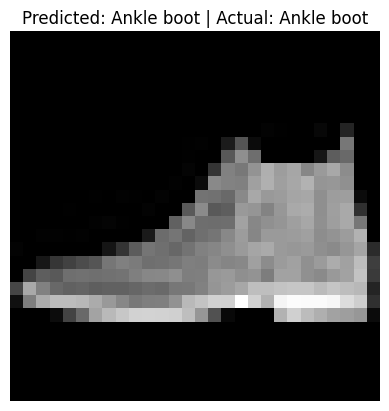

In [2]:
# View one of the test images with predicted and actual label
def show_image_with_prediction(index):
    plt.imshow(test_images[index].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {class_names[np.argmax(predictions[index])]} | Actual: {class_names[test_labels[index]]}")
    plt.axis('off')
    plt.show()

# View image at index 0
show_image_with_prediction(0)